In [27]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b
diff(f, a)

8*a**7 + 5*b - cos(c)

In [33]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 2*a*x + (b**2)
diff(f, a)

2*x

In [34]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 2*a*x + (b**2)
diff(f, a, 2)

0

In [44]:
from sympy import symbols, cos, diff

x, y = symbols('x y', real=True)
f = (x**2) - (y**2)
# Вычисляем первые частные производные
df_dx = diff(f, x)  # Производная по x
df_dy = diff(f, y)  # Производная по y

# Вычисляем значения производных в точке M(-2, -1)
point = {x: -2, y: -1}
df_dx_M = df_dx.subs(point)
df_dy_M = df_dy.subs(point)

print(f"Частная производная df/dx в точке M(-2, -1): {df_dx_M}")
print(f"Частная производная df/dy в точке M(-2, -1): {df_dy_M}")

Частная производная df/dx в точке M(-2, -1): -4
Частная производная df/dy в точке M(-2, -1): 2


In [46]:
from sympy import symbols, cos, diff

a, b = symbols('a b', real=True)
f = (5 - a - 2*b)**2
diff(f, b)

4*a + 8*b - 20

In [51]:
from sympy import symbols, cos, diff

x, y = symbols('x y', real=True)
f = (x**2) + 3*x*y + (4*y**2)
# Вычисляем первые частные производные
df_dx = diff(f, x)  # Производная по x
df_dy = diff(f, y)  # Производная по y

# Вычисляем значения производных в точке
point = {x: 1, y: 1}
df_dx_M = df_dx.subs(point)
df_dy_M = df_dy.subs(point)

print(f"Частная производная df/dx в точке: {df_dx_M}")
print(f"Частная производная df/dy в точке: {df_dy_M}")

Частная производная df/dx в точке: 5
Частная производная df/dy в точке: 11


In [61]:
from sympy import symbols, cos, diff, sin

x, y = symbols('x y', real=True)
f = y*sin(x) + sin(y)
diff(f, y)

sin(x) + cos(y)

*****************

# Функция Розенброка

In [1]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

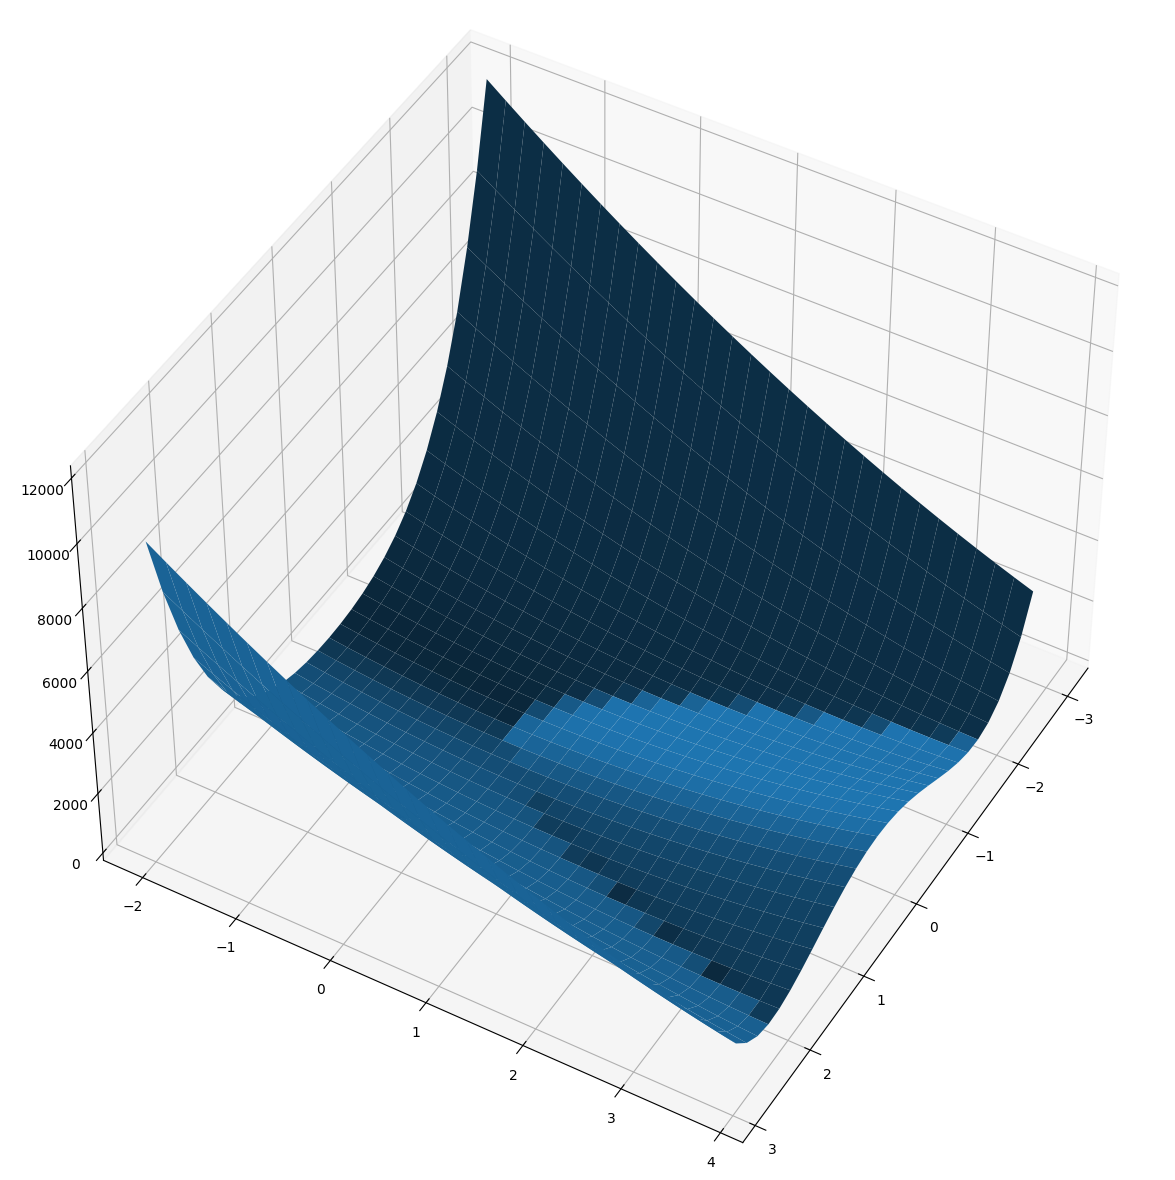

In [2]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.add_subplot(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

## метод Пауэлла

In [3]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


## метод Нелдера — Мида

In [4]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


In [35]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

from scipy.optimize import least_squares
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
res =  least_squares(func_rosen, x1)
print(res.x)

[0.93865173 0.88210868 0.776457   0.60278764 0.36076162]


## Метод множителей Лагранжа

In [37]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


In [49]:
from sympy import symbols, solve

x, y, w = symbols('x y w')
f = (x - 2)**2 + (y - 1)**2  # Квадрат расстояния
constraint = x + y - 1
lagrangian = f + w * constraint

# Производные
fx = lagrangian.diff(x)
fy = lagrangian.diff(y)
fw = lagrangian.diff(w)

# Решение системы (возвращает словарь)
solutions = solve([fx, fy, fw], x, y, w)

# Извлекаем значения переменных из словаря
x_sol = solutions[x]
y_sol = solutions[y]
w_sol = solutions[w]

# Квадрат расстояния от (2, 1) до найденной точки (x_sol, y_sol)
distance_squared = (x_sol - 2)**2 + (y_sol - 1)**2
print(distance_squared)

2


In [51]:
from sympy import *

a,b,c,w=symbols('a b c w')
g = 2*(a*b + a*c + b*c)

L = 2*(a*b + a*c + b*c) + w*(a*b*c - 1)

L_a = L.diff(a)
L_b = L.diff(b)
L_c = L.diff(c)
L_w = L.diff(w)

print(solve([L_a, L_b, L_c, L_w], a, b, c, w)[0])

(1, 1, 1, -4)


*******************

In [53]:
# Импортируем все необходимые функции из библиотеки SymPy
from sympy import init_printing, solve, symbols

# Подключаем аккуратный вывод формул
init_printing()

# Создаём переменные
x1, x2, x1_tilde, lambda1, lambda2 = symbols(
    "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
)

# Пишем систему уравнений для переменных
dLdx1 = -x2 + lambda1 - lambda2
dLdx2 = -x1 + lambda1
dLdx1_tilde = 2 * lambda2 * x1_tilde
dLdlambda1 = x1 + x2 - 10
dLdlambda2 = -x1 + 6 + x1_tilde**2

# Решаем систему уравнений с помощью функции solve
solution = solve(
    [dLdx1, dLdx2, dLdx1_tilde, dLdlambda1, dLdlambda2],
    x1,
    x2,
    x1_tilde,
    lambda1,
    lambda2,
)

print(solution)

[(6, 4, 0, 6, 2)]


<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\User\AppData\Local\Temp\ipykernel_28204\3823877321.py:9: SyntaxWarning: invalid escape sequence '\l'
  "x_1 x_2 xtilde_2 \lambda_1 \lambda_2", real=True
